# Alignment Issue

The final r and halpha mosaics are aligned ok when you align in ds9 using the WCS.  

However, when you align by image, there is an offset.  

Going to try to reproject the r-band image onto the halpha image.

In [1]:
import os
import numpy as np
from matplotlib import pyplot
from astropy.io import fits
from matplotlib import pyplot as plt
homedir = os.getenv("HOME")

In [2]:
def display_image(image,percent=99.5,lowrange=False,mask=None,sigclip=True):
    from astropy.stats import sigma_clip
    from astropy.visualization import simple_norm
    from matplotlib import pyplot as plt
    lowrange=False
    if sigclip:
        clipped_data = sigma_clip(image,sigma_lower=5,sigma_upper=5)#,grow=10)
    else:
        clipped_data = image
    if lowrange:
        norm = simple_norm(clipped_data, stretch='linear',percent=percent)
    else:
        norm = simple_norm(clipped_data, stretch='asinh',percent=percent)

    plt.imshow(image, norm=norm,cmap='gray_r',origin='lower')
    #v1,v2=scoreatpercentile(image,[.5,99.5])            
    #plt.imshow(image, cmap='gray_r',vmin=v1,vmax=v2,origin='lower')    


In [3]:
os.chdir('/media/rfinn/hdata2/BOK-alignment-test')

In [4]:
!ls

draco-alignment
plots
rband-rband.fits
VF-172.650+35.671-BOK-20210417-VFID2484-Ha4-CS.fits
VF-172.650+35.671-BOK-20210417-VFID2484-Ha4-CS-ZP.fits
VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits
VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.weight.fits
VF-172.650+35.671-BOK-20210417-VFID2484-r.fits
VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits
VF-172.650+35.671-BOK-20210417-VFID2484-r.weight.fits
VF-172.650+35.671-BOK-20210417-VFID2484-r.weight-shifted.fits


In [18]:
!rm *shifted.fits


In [5]:
himagename = 'VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
rimagename = 'VF-172.650+35.671-BOK-20210417-VFID2484-r.fits'
rshiftname = 'VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rweightname = 'VF-172.650+35.671-BOK-20210417-VFID2484-r.weight.fits'

In [11]:
rshiftauto = '/media/rfinn/hdata2/all-virgo-coadds/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
sautohdu = fits.open(rshiftauto)[0]

In [20]:
%run ~/github/HalphaImaging/python3/INT_align_images.py --help

usage: INT_align_images.py [-h] [--image1 IMAGE1] [--image2 IMAGE2]
                           [--weight2 WEIGHT2]

group objects by filter and target for combining with swarp

optional arguments:
  -h, --help         show this help message and exit
  --image1 IMAGE1    Image to serve as reference
  --image2 IMAGE2    Image to align to reference
  --weight2 WEIGHT2  Weight map for image2


In [6]:
%run ~/github/HalphaImaging/python3/INT_align_images.py --image1 $himagename --image2 $rimagename 

	 shifting image
	 elapsed time =  84.87990732491016
	 total time =  84.88020995631814


In [21]:
%run ~/github/HalphaImaging/python3/INT_align_images.py --image1 $himagename --image2 $rimagename --weight2 $rweightname

	 shifting image


/home/rfinn/anaconda3/lib/python3.7/site-packages/reproject/array_utils.py:30: RuntimeWarning: invalid value encountered in less
  reset |= (coords[i] < -0.5)
/home/rfinn/anaconda3/lib/python3.7/site-packages/reproject/array_utils.py:31: RuntimeWarning: invalid value encountered in greater
  reset |= (coords[i] > original_shape[i] - 0.5)


	 elapsed time =  92.57437176909298
	 shifting weight image
	 total time =  186.9649811629206


In [22]:
# test subtraction
hhdu = fits.open(himagename)[0]
rhdu = fits.open(rimagename)[0]
shdu = fits.open(rshiftname)[0]


In [23]:
# subtract images

sub_orig = hhdu.data - 0.0599*rhdu.data
sub_new = hhdu.data - 0.0599*shdu.data

sub_auto =  hhdu.data - 0.0599*sautohdu.data 

In [32]:
range = 

SyntaxError: invalid syntax (<ipython-input-32-05b24595c118>, line 1)

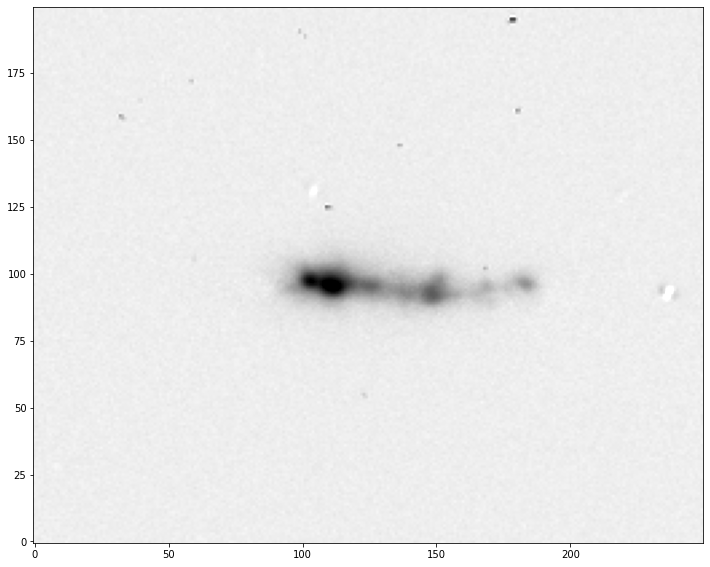

In [41]:
plt.figure(figsize=(12,12))
display_image(sub_new[1600:1800,1150:1400],percent=99.9)

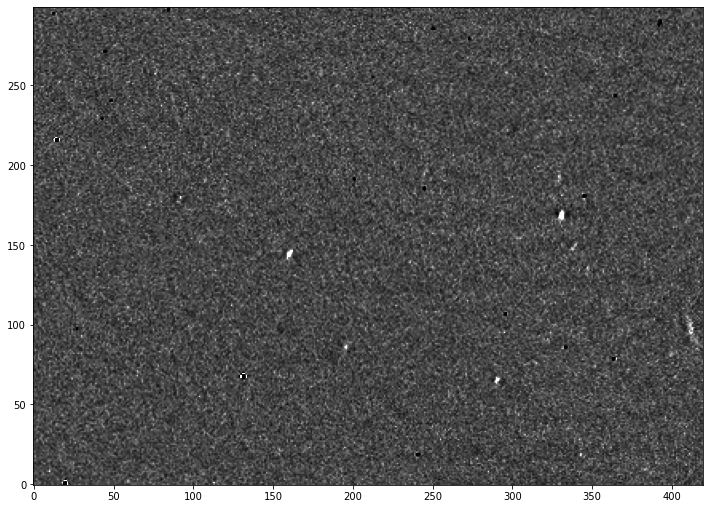

In [57]:
plt.figure(figsize=(12,12))
display_image(sub_new[1250:1550,2050:2470],percent=99.9,lowrange=True)

Text(0.5, 1.0, 'original r-band image')

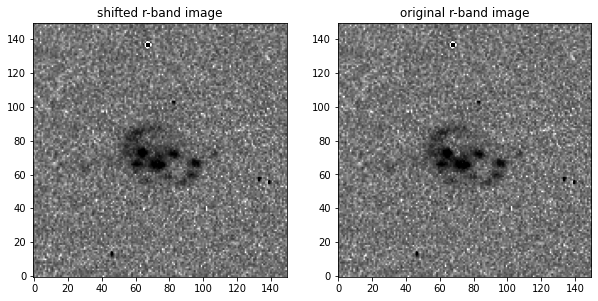

In [71]:
# VFID2427
plt.figure(figsize=(10,6))

xc = 5325
yc = 7152
dx = 150
dy = 150

plt.subplot(1,2,1)
display_image(sub_new[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("shifted r-band image")
plt.subplot(1,2,2)
display_image(sub_orig[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("original r-band image")

Text(0.5, 1.0, 'original r-band image')

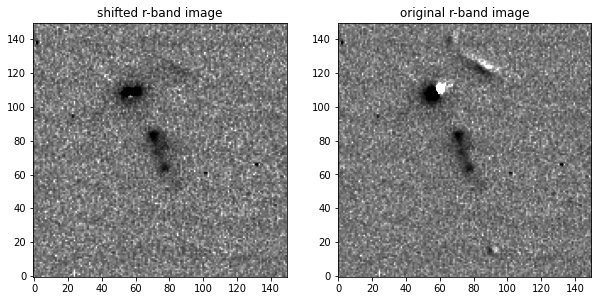

In [10]:
# VFID24234
plt.figure(figsize=(10,6))

xc = 8836
yc = 6458
dx = 150
dy = 150

plt.subplot(1,2,1)
display_image(sub_new[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("shifted r-band image")
plt.subplot(1,2,2)
display_image(sub_orig[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("original r-band image")

# Problems

30 images come out with different sizes in the halpha and shifted r-band images.  Just by 1 pixel in 1 of the dimensions.  How do I ensure that the output images have exactly the same size as the reference image???

In [74]:
from reproject import reproject_interp

In [75]:
help(reproject_interp)

Help on function reproject_interp in module reproject.interpolation.high_level:

reproject_interp(input_data, output_projection, shape_out=None, hdu_in=0, order='bilinear', independent_celestial_slices=False, output_array=None, return_footprint=True)
    Reproject data to a new projection using interpolation (this is typically
    the fastest way to reproject an image).
    
    Parameters
    ----------
    input_data
        The input data to reproject. This can be:
    
            * The name of a FITS file
            * An `~astropy.io.fits.HDUList` object
            * An image HDU object such as a `~astropy.io.fits.PrimaryHDU`,
              `~astropy.io.fits.ImageHDU`, or `~astropy.io.fits.CompImageHDU`
              instance
            * A tuple where the first element is a `~numpy.ndarray` and the
              second element is either a `~astropy.wcs.WCS` or a
              `~astropy.io.fits.Header` object
            * An `~astropy.nddata.NDData` object from which the ``.da

## Update after trying to fix all BOK images

* Below I am reading in the two images I built in this notebook.
* The third image is the shifted r-band image that is on draco as the latest version
* The shifted image on draco look correct.
* However, when I plot the CS cutout below, there is still an offset b/w r and halpha.

Text(0.5, 1.0, 'diff w/auto shifted r image')

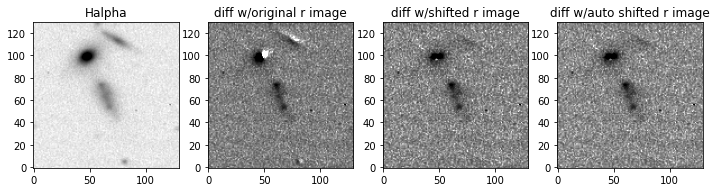

In [29]:
# VFID2434
plt.figure(figsize=(12,6))

xc = 8836
yc = 6458
dx = 131
dy = 131
plt.subplot(1,4,1)
display_image(hhdu.data[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("Halpha")

plt.subplot(1,4,2)
display_image(sub_orig[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/original r image")
plt.subplot(1,4,3)
display_image(sub_new[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/shifted r image")

plt.subplot(1,4,4)
display_image(sub_auto[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/auto shifted r image")

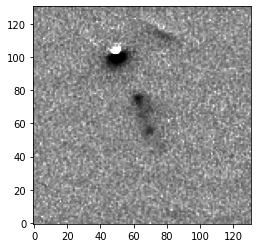

In [30]:
# display cutout
# this is the most recent version of the cutout, and it should be using the shifted r-band image
#
# however, this does not look like the right-most panel in the plot above, which is created using the shifted r-band image on draco
#
# so what is different about how cutouts are made in halphagui vs here.
# 
autocutout = '/media/rfinn/hdata2/halphagui-output-20240522/cutouts/VFID2434-AGC219722-BOK-20210417-VFID2484/VFID2434-AGC219722-BOK-20210417-VFID2484-CS-gr.fits'
adat = fits.getdata(autocutout)
display_image(adat)

Text(0.5, 1.0, 'diff w/auto shifted r image')

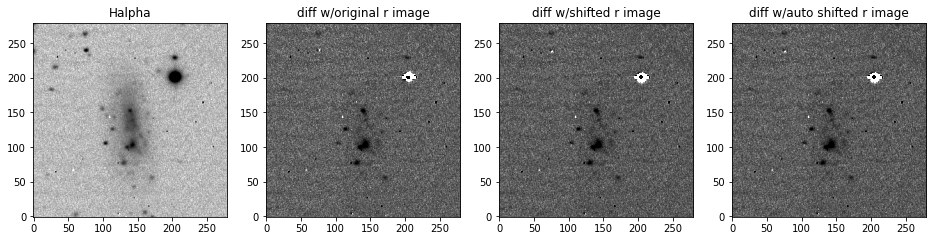

In [34]:
# VFID2439
plt.figure(figsize=(16,6))

xc = 5260
yc = 5994
dx = 280
dy = 280
plt.subplot(1,4,1)
display_image(hhdu.data[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("Halpha")

plt.subplot(1,4,2)
display_image(sub_orig[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/original r image")
plt.subplot(1,4,3)
display_image(sub_new[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/shifted r image")

plt.subplot(1,4,4)
display_image(sub_auto[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/auto shifted r image")

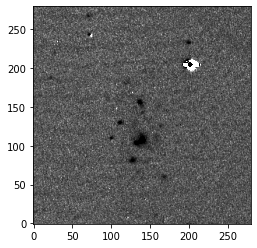

In [33]:
# display cutout
# this is the most recent version of the cutout, and it should be using the shifted r-band image
#
# however, this does not look like the right-most panel in the plot above, which is created using the shifted r-band image on draco
#
# so what is different about how cutouts are made in halphagui vs here.
# 
autocutout = '/media/rfinn/hdata2/halphagui-output-20240522/cutouts/VFID2439-UGC06499-BOK-20210417-VFID2484/VFID2439-UGC06499-BOK-20210417-VFID2484-CS-gr.fits'
adat = fits.getdata(autocutout)
display_image(adat)

Text(0.5, 1.0, 'diff w/auto shifted r image')

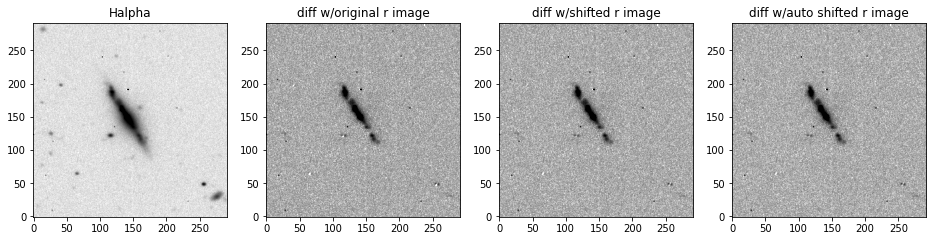

In [36]:
# VFID2434
plt.figure(figsize=(16,6))

xc = 3755
yc = 3764
dx = 292
dy = 292
plt.subplot(1,4,1)
display_image(hhdu.data[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("Halpha")

plt.subplot(1,4,2)
display_image(sub_orig[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/original r image")
plt.subplot(1,4,3)
display_image(sub_new[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/shifted r image")

plt.subplot(1,4,4)
display_image(sub_auto[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("diff w/auto shifted r image")

Text(0.5, 1.0, 'manual diff w/auto shifted r image')

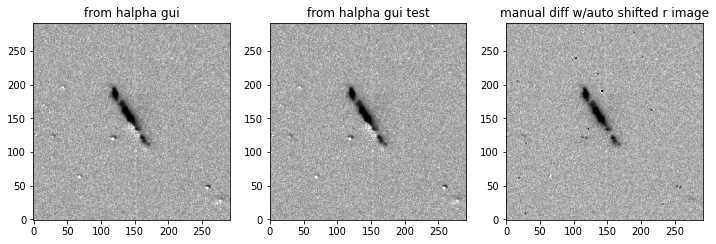

In [47]:
# display cutout
# this is the most recent version of the cutout, and it should be using the shifted r-band image
#
# however, this does not look like the right-most panel in the plot above, which is created using the shifted r-band image on draco
#
# so what is different about how cutouts are made in halphagui vs here.
# 

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
autocutout = '/media/rfinn/hdata2/halphagui-output-20240522/cutouts/VFID2462-KUG1128+358-BOK-20210417-VFID2484/VFID2462-KUG1128+358-BOK-20210417-VFID2484-CS.fits'
adat = fits.getdata(autocutout)
display_image(adat)
plt.title("from halpha gui")
plt.subplot(1,3,2)
autocutout = '/media/rfinn/hdata2/halphagui-output-BOK-alignment-test-20240627/cutouts/VFID2462-KUG1128+358-BOK-20210417-VFID2484/VFID2462-KUG1128+358-BOK-20210417-VFID2484-CS.fits'
adat = fits.getdata(autocutout)
display_image(adat)
plt.title("from halpha gui test")
plt.subplot(1,3,3)
display_image(sub_auto[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("manual diff w/auto shifted r image")

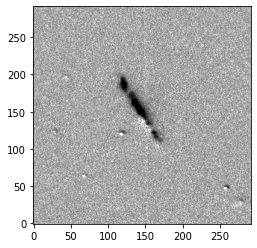

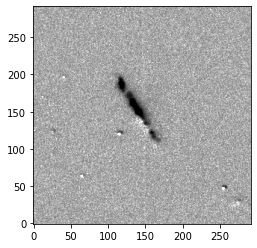

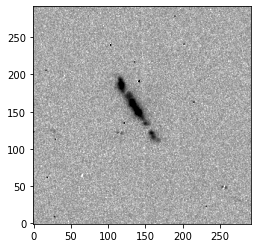

In [67]:
rfile = '/media/rfinn/hdata2/halphagui-output-BOK-alignment-test-20240627/cutouts/VFID2462-KUG1128+358-BOK-20210417-VFID2484/VFID2462-KUG1128+358-BOK-20210417-VFID2484-R.fits'
rdat = fits.getdata(rfile)
hfile = '/media/rfinn/hdata2/halphagui-output-BOK-alignment-test-20240627/cutouts/VFID2462-KUG1128+358-BOK-20210417-VFID2484/VFID2462-KUG1128+358-BOK-20210417-VFID2484-Ha.fits'
hdat = fits.getdata(hfile)

testsub = hdat - 0.0608*rdat
display_image(testsub)


# try full images
rfile = '/media/rfinn/hdata2/all-virgo-coadds/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat = fits.getdata(rfile)
hfile = '/media/rfinn/hdata2/all-virgo-coadds/VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
hdat = fits.getdata(hfile)

plt.figure()
testsub = hdat[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - 0.0608*rdat[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)




# try full images
rfile = 'VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat = fits.getdata(rfile)
hfile = 'VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
hdat = fits.getdata(hfile)

plt.figure()
testsub = hdat[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - 0.0608*rdat[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

In [60]:
!ls -lth

total 3.1G
drwxrwxrwx 1 rfinn rfinn 1.0M Jun 27 15:32 plots
-rwxrwxrwx 1 rfinn rfinn 618M Jun 27 14:49 VF-172.650+35.671-BOK-20210417-VFID2484-r.weight-shifted.fits
-rwxrwxrwx 1 rfinn rfinn 618M Jun 27 14:47 VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits
-rwxrwxrwx 1 rfinn rfinn 310M Jun 22  2023 VF-172.650+35.671-BOK-20210417-VFID2484-r.weight.fits
-rwxrwxrwx 1 rfinn rfinn 310M Jun 22  2023 VF-172.650+35.671-BOK-20210417-VFID2484-r.fits
-rwxrwxrwx 1 rfinn rfinn 310M Jun 22  2023 VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.weight.fits
-rwxrwxrwx 1 rfinn rfinn 310M Jun 22  2023 VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits
-rwxrwxrwx 1 rfinn rfinn 310M Jun 22  2023 VF-172.650+35.671-BOK-20210417-VFID2484-Ha4-CS-ZP.fits
-rwxrwxrwx 1 rfinn rfinn 310M Jun 22  2023 VF-172.650+35.671-BOK-20210417-VFID2484-Ha4-CS.fits


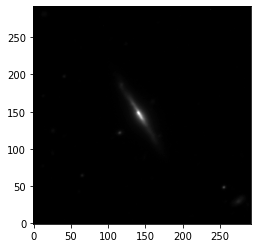

In [69]:
# subtracting the two shifted r-band images
# try full images
rfile = '/media/rfinn/hdata2/all-virgo-coadds/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat1 = fits.getdata(rfile)

# try full images
rfile = 'VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat2 = fits.getdata(rfile)

plt.figure()
testsub = rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - rdat2[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub,percent=99.99)

fits.writeto('rband-rband.fits',testsub,overwrite=True)

In [65]:
pwd

'/media/rfinn/hdata2/BOK-alignment-test'

In [70]:
import reproject

In [73]:
reproject.version

<module 'reproject.version' from '/home/rfinn/anaconda3/lib/python3.7/site-packages/reproject/version.py'>

In [76]:
help(reproject.version
    )

Help on module reproject.version in reproject:

NAME
    reproject.version

DESCRIPTION
    # Note that we need to fall back to the hard-coded version if either
    # setuptools_scm can't be imported or setuptools_scm can't determine the
    # version, so we catch the generic 'Exception'.

DATA
    version = '0.8'

FILE
    /home/rfinn/anaconda3/lib/python3.7/site-packages/reproject/version.py




# Differences in reproject?

I pulled HalphaImaging on draco, and I am redoing the image shifting using

`INT_align_images.py`, which is the exact same program that I used to align the images on my laptop.



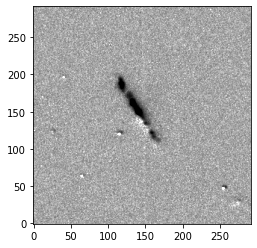

In [80]:
# subtracting the two shifted r-band images
# try full images
rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat1 = fits.getdata(rfile)

hfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
hdat1 = fits.getdata(hfile)
# try full images


plt.figure()
testsub = hdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - 0.0608*rdat[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

fits.writeto('rband-rband.fits',testsub,overwrite=True)

moved images over to laptop, moved 

```
rfinn@virgof:/media/rfinn/hdata2/BOK-alignment-test/draco-alignment$ mv VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted-draco.fits
```
```
conda activate havirgo
pip install ccdproc
python ~/github/HalphaImaging/python3/INT_align_images.py --image1 VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits --image2 VF-172.650+35.671-BOK-20210417-VFID2484-r.fits
```


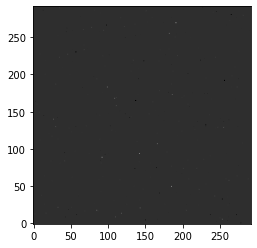

In [81]:
# subtracting the two shifted r-band images
# try full images
rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted-draco.fits'
rdat1 = fits.getdata(rfile)


# subtracting the two shifted r-band images
# try full images
rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat2 = fits.getdata(rfile)



plt.figure()
testsub = rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - rdat2[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub,percent=99.99)

fits.writeto('rband-rband.fits',testsub,overwrite=True)

# this returns zeros, but 

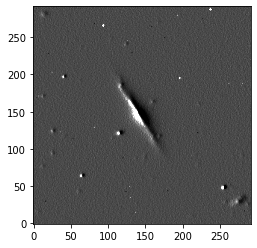

In [9]:
# subtracting the two shifted r-band images
# try full images


xc = 3755
yc = 3764
dx = 292
dy = 292

rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted-draco.fits'
rdat1 = fits.getdata(rfile)


# subtracting the two shifted r-band images
# try full images
rfile = '/media/rfinn/hdata2/BOK-alignment-test/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat2 = fits.getdata(rfile)



plt.figure()
testsub = rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - rdat2[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

fits.writeto('rband-rband2.fits',testsub,overwrite=True)

# this returns zeros, but 

So there is something different in reproject.

Running INT_align again from `/media/rfinn/hdata2/BOK-alignment-test`, just in case there is something different about the images.

```
/media/rfinn/hdata2/BOK-alignment-test$ mv VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted-jupyter.fits

python ~/github/HalphaImaging/python3/INT_align_images.py --image1 VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits --image2 VF-172.650+35.671-BOK-20210417-VFID2484-r.fits
```

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/visualization/mpl_normalize.py:164: RuntimeWarning: divide by zero encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/visualization/mpl_normalize.py:164: RuntimeWarning: invalid value encountered in true_divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:502: RuntimeWarning: overflow encountered in arcsinh
  np.arcsinh(values, out=values)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/visualization/stretch.py:502: RuntimeWarning: invalid value encountered in arcsinh
  np.arcsinh(values, out=values)


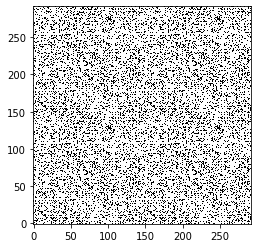

In [10]:
# subtracting the two shifted r-band images
# try full images


xc = 3755
yc = 3764
dx = 292
dy = 292

rfile = '/media/rfinn/hdata2/BOK-alignment-test/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted-jupyter.fits'
rdat1 = fits.getdata(rfile)



# subtracting the two shifted r-band images
# try full images
rfile = '/media/rfinn/hdata2/BOK-alignment-test/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat2 = fits.getdata(rfile)



plt.figure()
testsub = rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - rdat2[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

fits.writeto('rband-rband2.fits',testsub,overwrite=True)


So the command line havirgo and jupyter reproject produce the same thing.  This means there must be something different in halpha and/or r-band images from draco compared to what I have in the 

```
/media/rfinn/hdata2/BOK-alignment-test
```
folder.

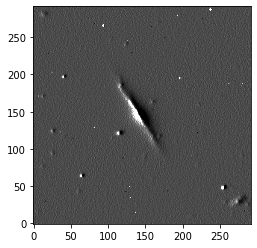

In [12]:
# subtracting the two shifted r-band images
# try full images


xc = 3755
yc = 3764
dx = 292
dy = 292

rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted-laptop-havirgo.fits'
rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-r.fits'
rdat1 = fits.getdata(rfile)



# subtracting the two shifted r-band images
# try full images
rfile = '/media/rfinn/hdata2/BOK-alignment-test/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rfile = '/media/rfinn/hdata2/BOK-alignment-test/VF-172.650+35.671-BOK-20210417-VFID2484-r.fits'
rdat2 = fits.getdata(rfile)



plt.figure()
testsub = rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - rdat2[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

fits.writeto('rband-rband2.fits',testsub,overwrite=True)

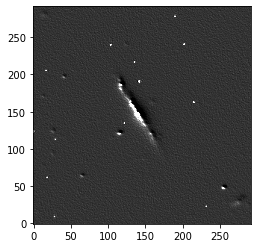

In [13]:
# subtracting the two shifted r-band images
# try full images


xc = 3755
yc = 3764
dx = 292
dy = 292

rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted-laptop-havirgo.fits'
rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-alignment/VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
rdat1 = fits.getdata(rfile)



# subtracting the two shifted r-band images
# try full images
rfile = '/media/rfinn/hdata2/BOK-alignment-test/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rfile = '/media/rfinn/hdata2/BOK-alignment-test/VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
rdat2 = fits.getdata(rfile)



plt.figure()
testsub = rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - rdat2[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

fits.writeto('rband-rband2.fits',testsub,overwrite=True)

The images in my test folder are from `Jun 27 2023`, so about a year ago.  I must have rebuilt the BOK coadds, but what is different?


In `/data-pool/Halpha/coadds/all-virgo-coadds`, the BOK r-band images are from `Jun 26 2023`
but the Ha4 images are from `May 30 2024`.


## Progress?

* I may have shifted the images in BOKv0 rather than in all-virgo-coadds.  Maybe the halpha images are slightly different in that directory compared to all-virgo-coadds.
* I am copying the ha4 and r-band images from all-virgo-coadds

```
rfinn@virgof:/media/rfinn/hdata2/BOK-alignment-test/draco-all-virgo-coadds$ rsync -avz draco:/data-pool/Halpha/coadds/all-virgo-coadds/VF-172.650*.fits .

```

* running INT shift images


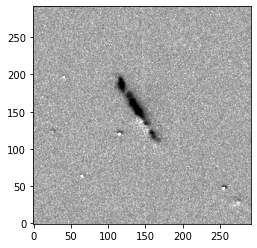

In [16]:

# try full images


xc = 3755
yc = 3764
dx = 292
dy = 292

rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-all-virgo-coadds/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat1 = fits.getdata(rfile)



# subtracting the two shifted r-band images
# try full images
hfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-all-virgo-coadds/VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
hdat1 = fits.getdata(hfile)



plt.figure()
testsub = hdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - 0.0608*rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

fits.writeto('virgo-coadds-cont.fits',testsub,overwrite=True)


# another version of coadds

* There is a directory on draco

```
/data-pool/Halpha/coadds/virgo-coadds-BOK-all-v0
```

* copying coadds from there
* ran shift images from command line
```
python ~/github/HalphaImaging/python3/INT_align_images.py --image1 VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits --image2 VF-172.650+35.671-BOK-20210417-VFID2484-r.fits
```


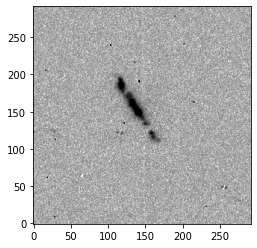

In [17]:
rfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-virgo-coadds-BOK-all-v0/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat1 = fits.getdata(rfile)



# subtracting the two shifted r-band images
# try full images
hfile = '/media/rfinn/hdata2/BOK-alignment-test/draco-virgo-coadds-BOK-all-v0/VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
hdat1 = fits.getdata(hfile)



xc = 3755
yc = 3764
dx = 292
dy = 292

plt.figure()
testsub = hdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - 0.0608*rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

fits.writeto('virgo-coadds-cont.fits',testsub,overwrite=True)


* so now I just need to figure out how I made these coadds - I think it was w/out running scamp and using the pipeline wcs.

* one odd thing is that the r-band images still have cosmic rays in them - not sure why...  The versions that I have from running scamp don't have cosmic rays.

* according to my notes, not every coadd worked based on the pipeline wcs (I didn't record which ones), but maybe I can just rerun those?

* looking at the output plots, it seems like there are a lot of images that still have problems with the amp offsets - the residuals still clearly show offsets between the individual amps.




# One more check to make sure I am using the right versions of the coadds

* the latest build was 2023-Jun-26.
* copied coadds from this directory to hdata2
* this confirms that 2023-Jun-26 build is not good for all coadds, although it works fine for some...

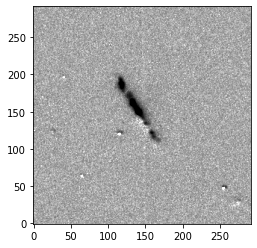

In [18]:
rfile = '/media/rfinn/hdata2/BOK-alignment-test/coadd-from-2023Jun26/VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rdat1 = fits.getdata(rfile)



# subtracting the two shifted r-band images
# try full images
hfile = '/media/rfinn/hdata2/BOK-alignment-test/coadd-from-2023Jun26/VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
hdat1 = fits.getdata(hfile)



xc = 3755
yc = 3764
dx = 292
dy = 292

plt.figure()
testsub = hdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2] - 0.0608*rdat1[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2]
display_image(testsub)

fits.writeto('virgo-coadds-cont.fits',testsub,overwrite=True)


# Rebuilding one coadd

* I just looked through some of the BOK data on the coadd website, and a lot of them look fine.  
* Before wiping everything, I am going to rebuild a coadd for VF-172.650 to see if I can reproduce the problem.

```
(havirgo) rfinn@virgof:/media/rfinn/hdata2/BOK-alignment-test/rebuild-VF-172.650-mosaic$ rsync -avz draco://data-pool/Halpha/processed/BOK2021-22/zmksb_210417_04{0..6}*r_v1.fits .
```

```
(havirgo) rfinn@virgof:/media/rfinn/hdata2/BOK-alignment-test/rebuild-VF-172.650-mosaic$ rsync -avz draco://data-pool/Halpha/processed/BOK2021-22/zmksb_210417_04{0..4}*Ha+4nm_v1.fits .
```

# scamp and swarp

* The coadds I have in the test directory from `Jun 22 2023` must be before I ran scamp and swarp myself.
